<a href="https://colab.research.google.com/github/Welle-Kim/Based-on-the-Review/blob/master/%EB%82%B4_%EC%83%9D%EC%9D%BC%EC%9D%98_%EA%B8%B0%EC%98%A8%EB%B3%80%ED%99%94_%EA%B7%B8%EB%9E%98%ED%94%84_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#코랩에서 한글사용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
import csv
import time

- 날씨 데이터 읽어오기
- 헤더 부분(제목)을 next() 함수를 사용해 제외
- 내 생일의 최고기온/최저기온 저장 변수 생성

In [51]:
strt=time.time()

f=open("seoul_weather.csv",encoding="cp949")
data=csv.reader(f)
header=next(data)
print(header,"\n")

# "최고기온" 중 가장 높은 온도값/해당 온도의 "일시"를 출력
# 일자별 최고 온도 찾기 = > 이 온도의 날짜 가져오기

low_temp= 999
max_temp=-999 # 최고 온도를 계산하기 위한 변수(최초 -999 부여)
max_date="" # 최고 온도를 찾았을때 날짜를 저장할 변수

for row in data:
  # row 값 => ['서울', '1907-10-01', '13.5', '7.9', '20.7']
  try:
    row[-1]=float(row[-1]) # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
    if max_temp<row[-1]:  # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
      max_temp=row[-1]
      max_date = row[1]
  except:
    continue
    # row[-1] = -999
    #print(f"row[-1]에 입력된 값:{row[-1]}입니다.")

  for row in data:
    # row 값 => ['서울', '1907-10-01', '13.5', '7.9', '20.7']
    try:
      row[-2]=float(row[-2]) # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
      if low_temp>row[-2]:  # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
        low_temp=row[-2]
      if row[-1] == '':
        row[-1] = -999
        row[-1] = float(row[-1])
    except:
      continue
    # row[-1] = -999
    #print(f"row[-1]에 입력된 값:{row[-1]}입니다.")


f.close()

print(f"기상관측을 시작한 이래 서울의 최고기온은 {max_temp}이고,최저기온은 {low_temp},날짜는 {max_date}입니다.")

endt=time.time()
print(endt-strt)


['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'] 

기상관측을 시작한 이래 서울의 최고기온은 20.7이고,최저기온은 -23.1,날짜는 1907-10-01입니다.
0.0704352855682373


- 년도별 생일날의 최고기온/최저기온 추출하기
- 추출한 데이터 리스트 변수에 저장하기

In [3]:
# 모듈 연결 및 파일 읽기
import pandas as pd
df=pd.read_csv("seoul_weather.csv",encoding="cp949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41382 entries, 0 to 41381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41382 non-null  object 
 1   일시       41382 non-null  object 
 2   평균기온(℃)  40626 non-null  float64
 3   최저기온(℃)  40625 non-null  float64
 4   최고기온(℃)  40624 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [4]:
# 결측지(NaN) 처리 => 한행에 3개이상 존재하면 해당 행 삭제
print(df.isna().sum()) # 각 필드(열)별 NaN 갯수 확인(삭제전)

df=df.dropna(thresh=3)
print(df.isna().sum()) #삭제후

지점명          0
일시           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64
지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    2
dtype: int64


In [5]:
df=df.fillna(method="bfill")
print(df.isna().sum())

지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64


In [53]:
df.iloc[:,1]

0        1907-10-01
1        1907-10-02
2        1907-10-03
3        1907-10-04
4        1907-10-05
            ...    
41377    2022-03-09
41378    2022-03-10
41379    2022-03-11
41380    2022-03-12
41381    2022-03-13
Name: 일시, Length: 40626, dtype: object

In [2]:
# 모든 생일날의 최고/최저 온도와 날짜 받아오기
import csv

f=open("seoul_weather.csv",encoding="cp949")
data=csv.reader(f)
next(data)

max_temp=[]
min_temp=[]
date_tmp=[]

for row in data: # csv.reader에서 1개씩 읽어오기
  # NaN 확인(최고/최저 기온 모두 값이 있다면/NaN이 아니라면)
  if row[-2]!="" and row[-1]!="":
    if int(row[1].split("-")[0])>=1997:
      if row[1][5:7]=="07"and row[1][-2:]=="13":
        max_temp.append(float(row[-1])) #최고기온 리스트 추가
        min_temp.append(float(row[-2])) #최저기온리스트 추가
        date_tmp.append(row[1][:4])

print(max_temp)

[30.6, 29.4, 30.9, 31.0, 31.4, 29.3, 29.9, 22.8, 26.1, 27.2, 30.7, 29.7, 27.7, 31.3, 26.2, 29.3, 25.6, 29.4, 24.9, 29.5, 32.1, 30.9, 29.7, 21.7, 31.5]


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

###그래프 그리기

-최고/최저 온도를 출력하는 차트 그리기

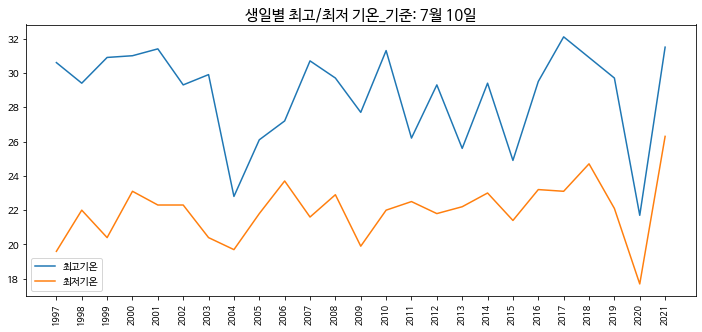

In [3]:
import matplotlib.pyplot as plt

plt.rc("font",family="NanumBarunGothic")

plt.figure(figsize=(12,5))
plt.plot(max_temp,label="최고기온")
plt.plot(min_temp,label="최저기온")

plt.title("생일별 최고/최저 기온_기준: 7월 10일", size = 15)
plt.legend()
plt.xticks(list(range(len(date_tmp))), labels=date_tmp, rotation=90, size=9)

plt.show()

##pandas 모듈 이용

In [8]:
import pandas as pd

#pandas 모듈로 파일 읽어오기
df=pd.read_csv("seoul_weather.csv",encoding="cp949")
#print(df.info())

# df에서 "일시" 날짜형 데이터로 변경하기
df["일시"]=pd.to_datetime(df["일시"])
# print(df.dtypes)

df=df.dropna(thresh=3)
df=df.fillna(method="ffill")
# print(df.isna().sum())

# 생일을 기준으로 오늘날짜까지 생일날의 최고/최저 온도 추출하기
bir_df=df[(df["일시"]>="1997-07-10")&(df["일시"].dt.month==7)&(df["일시"].dt.day==13)]
bir_df

,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃)
32362,서울,1997-07-13,25.2,19.6,30.6
32727,서울,1998-07-13,25.8,22.0,29.4
33092,서울,1999-07-13,26.1,20.4,30.9
33458,서울,2000-07-13,25.9,23.1,31.0
33823,서울,2001-07-13,26.7,22.3,31.4
34188,서울,2002-07-13,25.1,22.3,29.3
34553,서울,2003-07-13,24.5,20.4,29.9
34919,서울,2004-07-13,21.0,19.7,22.8
35284,서울,2005-07-13,23.3,21.8,26.1
35649,서울,2006-07-13,25.2,23.7,27.2


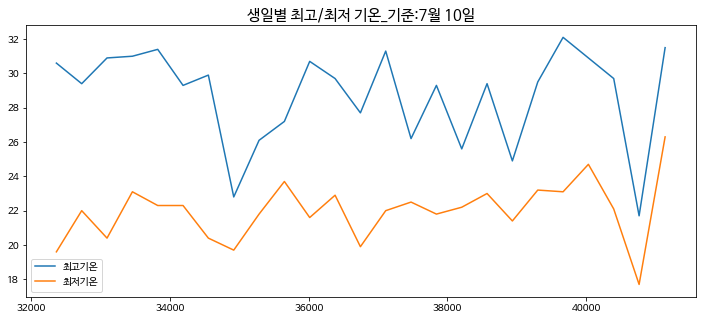

In [9]:
# 차트에 출력하기
import matplotlib.pyplot as plt

plt.rc("font",family="NanumBarunGothic")

plt.figure( figsize = (12, 5))
plt.plot(bir_df['최고기온(℃)'], label="최고기온")
plt.plot(bir_df['최저기온(℃)'], label="최저기온")

date_lst=bir_df["일시"].dt.year

plt.title("생일별 최고/최저 기온_기준:7월 10일",size=15)
plt.legend()

plt.show()